In [1]:
%run Scaffold_Y_lipo.ipynb

In [2]:
model.compartments

{'e': 'extracellular space',
 'c': 'cytosol',
 'm': 'mitochondria',
 'x': 'peroxisome/glyoxysome',
 'n': 'nucleus',
 'g': 'golgi apparatus',
 'v': 'vacuole',
 'r': 'endoplasmic reticulum'}

In [3]:
print(model.objective)

Maximize
1.0*BIOMASS_SC4_bal - 1.0*BIOMASS_SC4_bal_reverse_bb385


In [4]:
model.medium

{'EX_nh4_e': 999999.0,
 'EX_o2_e': 999999.0,
 'EX_pi_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_glc__D_e': 1.0,
 'EX_h2o_e': 999999.0}

### INSTEAD - Go check the metabolic activity 

In [7]:
medium = model.medium
with model:
    medium['EX_glc__D_e'] = 200
    model.medium = medium
    EPA_production = model.optimize().objective_value
    print('Maximum productivity =', EPA_production, 'mmol/gDW*h')
    maximum_yield = EPA_production / (-1*(model.reactions.get_by_id('EX_glc__D_e').flux))
    print('Maximum theoretical yield =', maximum_yield, 'mmol-EPA/mmol-glc')
    print('Objective of model is =', model.objective)

Maximum productivity = 19.46467518075362 mmol/gDW*h
Maximum theoretical yield = 0.0973233759037681 mmol-EPA/mmol-glc
Objective of model is = Maximize
1.0*BIOMASS_SC4_bal - 1.0*BIOMASS_SC4_bal_reverse_bb385


#### We can now find the maximum theoretical productivity of biomass and EPA using the model's standard media:

In [8]:
model.objective = model.reactions.BIOMASS_SC4_bal
solution = model.optimize()
print('Maximum theoretical biomass productivity:', solution.fluxes['BIOMASS_SC4_bal'], '/h') 

model.objective = model.reactions.DM_Eicosapentaenoic_Acid
EPA_prod = model.optimize().objective_value
print('Maximum theoretical productivity of EPA:', EPA_prod, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 0.09732337590376837 /h
Maximum theoretical productivity of EPA: 0.15900233826968102 mmol/gDW*h


In [9]:
solution.fluxes['BIOMASS_SC4_bal']

0.09732337590376837

## Find the optimal medium for the model

In [10]:
model.reactions.BIOMASS_SC4_bal

Reaction identifier,BIOMASS_SC4_bal
Name,Biomass SC4 bal
Memory address,0x1d25326f890
Stoichiometry,1.1348 13BDglcn_c + 0.4588 ala__L_c + 0.046 amp_c + 0.1607 arg__L_c + 0.1017 asn__L_c + 0.2975 asp__L_c + 59.276 atp_c + 0.0447 cmp_c + 0.0066 cys__L_c + 0.0036 damp_c + 0.0024 dcmp_c + 0.0024... 1.1348 1 3 beta D Glucan C6H10O5 + 0.4588 L-Alanine + 0.046 AMP C10H12N5O7P + 0.1607 L-Arginine + 0.1017 L-Asparagine + 0.2975 L-Aspartate + 59.276 ATP C10H12N5O13P3 + 0.0447 CMP C9H12N3O8P +...
GPR,
Lower bound,0.0
Upper bound,999999.0


In [11]:
YEPDmedium = model.medium
YEPDmedium['EX_glc__D_e'] = 20 #Glucose
YEPDmedium['EX_ala__L_e'] = 10 #Alanine
YEPDmedium['EX_arg__L_e'] = 10 #Arginine
YEPDmedium['EX_asn__L_e'] = 10 #Aspargine
YEPDmedium['EX_cys__L_e'] = 10 #Cysteine
YEPDmedium['EX_glu__L_e'] = 10 #Glutamate
YEPDmedium['EX_gly_e'] = 10    #Glycine
YEPDmedium['EX_his__L_e'] = 10 #Histidine
YEPDmedium['EX_ile__L_e'] = 10 #Isoleucine
YEPDmedium['EX_leu__L_e'] = 10 #Leucine
YEPDmedium['EX_lys__L_e'] = 10 #Lysine
YEPDmedium['EX_met__L_e'] = 10 #Methionine
YEPDmedium['EX_phe__L_e'] = 10 #Phenylalanine
YEPDmedium['EX_pro__L_e'] = 10 #Proline
YEPDmedium['EX_ser__L_e'] = 10 #Serine
YEPDmedium['EX_thr__L_e'] = 10 #Threonine
YEPDmedium['EX_trp__L_e'] = 10 #Tryptophan
YEPDmedium['EX_tyr__L_e'] = 10 #Tyrosine
YEPDmedium['EX_val__L_e'] = 10 #Valine
YEPDmedium['EX_nh4_e'] = 1000 #Ammonia
YEPDmedium['EX_o2_e'] = 1000 #Oxygen
YEPDmedium['EX_pi_e'] = 1000 #Phosphate
YEPDmedium['EX_so4_e'] = 1000 #Sulphate
YEPDmedium['EX_h2o_e'] = 1000 #Water
#YEPDmedium['r_4596'] = 10 #Zinc is not incorporated in the model
#YEPDmedium['r_1861'] = 10 #Iron is not incorporated in the model

#### The maximum theoretical productivity of biomass and EPA using the YEPD mimicking media:

In [12]:
model.objective = model.reactions.BIOMASS_SC4_bal
model.medium = YEPDmedium
solution = model.optimize()
print('Maximum theoretical biomass productivity:', solution.fluxes['BIOMASS_SC4_bal'], '/h') 

model.objective = model.reactions.DM_Eicosapentaenoic_Acid
EPA_production = model.optimize().objective_value
print('Maximum theoretical productivity of EPA pathway reaction:', EPA_production, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 6.385230506882285 /h
Maximum theoretical productivity of EPA pathway reaction: 9.796860572483833 mmol/gDW*h


## Changing carbonsource

In [13]:
model.objective = model.reactions.BIOMASS_SC4_bal
medium = model.medium
with model:
    medium['EX_glc__D_e'] = 0 #Glucose
    medium['EX_glyc_e'] = 20 #Glycerol
    model.medium = medium
    
    solution2 = model.optimize()
    print('Maximum theoretical biomass productivity:', solution2.fluxes['BIOMASS_SC4_bal'], '/h')
    
    model.objective = model.reactions.DM_Eicosapentaenoic_Acid
    EPA_production2 = model.optimize().objective_value
    print('Maximum theoretical productivity of EPA pathway reaction:', EPA_production2, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 5.16881956975369 /h
Maximum theoretical productivity of EPA pathway reaction: 8.062088428974636 mmol/gDW*h


In [14]:
model.objective = model.reactions.BIOMASS_SC4_bal
medium = model.medium
with model:
    medium['EX_glc__D_e'] = 0 #Glucose
    medium['EX_succ_e'] = 20 #Succinate
    model.medium = medium
    
    solution3 = model.optimize()
    print('Maximum theoretical biomass productivity:', solution3.fluxes['BIOMASS_SC4_bal'], '/h')
    
    model.objective = model.reactions.DM_Eicosapentaenoic_Acid
    EPA_production3 = model.optimize().objective_value
    print('Maximum theoretical productivity of EPA pathway reaction:', EPA_production3, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 4.4920703922914145 /h
Maximum theoretical productivity of EPA pathway reaction: 7.213930348258664 mmol/gDW*h


In [15]:
model.objective = model.reactions.BIOMASS_SC4_bal
medium = model.medium
with model:
    medium['EX_glc__D_e'] = 0 #Glucose
    medium['EX_xyl__D_e'] = 20 #Xylose
    model.medium = medium
    
    solution4 = model.optimize()
    print('Maximum theoretical biomass productivity:', solution4.fluxes['BIOMASS_SC4_bal'], '/h')
    
    model.objective = model.reactions.DM_Eicosapentaenoic_Acid
    EPA_production4 = model.optimize().objective_value
    print('Maximum theoretical productivity of EPA pathway reaction:', EPA_production4, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 5.940553047182272 /h
Maximum theoretical productivity of EPA pathway reaction: 9.021237303785712 mmol/gDW*h


##### Plotting the effect the different carbon sources have on productivity

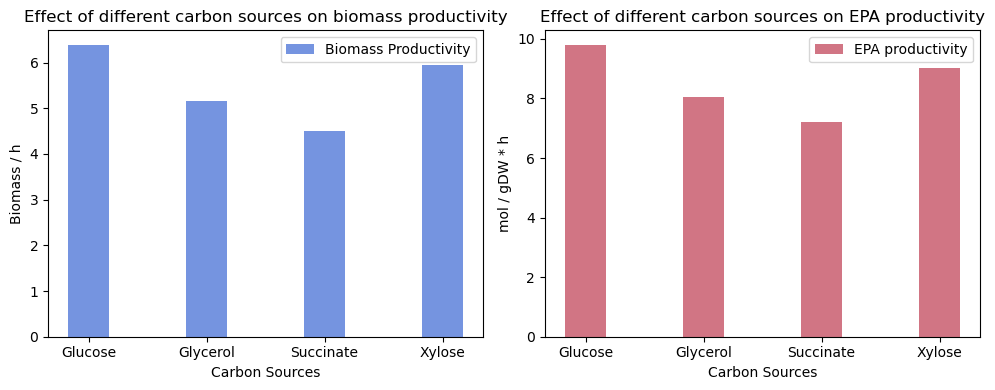

In [16]:
import matplotlib.pyplot as plt
import numpy as np

color1 = (0.1, # redness
         0.3, # greenness
         0.8, # blueness
         0.6 # transparency 
        ) 

color2 = (0.7, # redness
         0.1, # greenness
         0.2, # blueness
         0.6 # transparency 
        ) 

# Sample data
carbon_sources = ['Glucose', 'Glycerol', 'Succinate', 'Xylose']
Biomass = [solution.fluxes['BIOMASS_SC4_bal'], solution2.fluxes['BIOMASS_SC4_bal'], solution3.fluxes['BIOMASS_SC4_bal'], solution4.fluxes['BIOMASS_SC4_bal']]
EPA = [EPA_production, EPA_production2, EPA_production3, EPA_production4]

# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Width of the bars
bar_width = 0.35

# Create bar plots on the first axis
bar1 = ax1.bar(np.arange(len(carbon_sources)), Biomass, bar_width, label='Biomass Productivity', color=color1)
ax1.set_xlabel('Carbon Sources')
ax1.set_ylabel('Biomass / h')
ax1.set_title('Effect of different carbon sources on biomass productivity')
ax1.set_xticks(np.arange(len(carbon_sources)))
ax1.set_xticklabels(carbon_sources)
ax1.legend()

# Create bar plots on the second axis
bar2 = ax2.bar(np.arange(len(carbon_sources)), EPA, bar_width, label='EPA productivity', color=color2)
ax2.set_xlabel('Carbon Sources')
ax2.set_ylabel('mol / gDW * h')
ax2.set_title('Effect of different carbon sources on EPA productivity')
ax2.set_xticks(np.arange(len(carbon_sources)))
ax2.set_xticklabels(carbon_sources)
ax2.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

##### We can see from the two barplots above, that using glucose and xylose yield approximately the same productivity, 

In [17]:
model.objective = model.reactions.BIOMASS_SC4_bal
medium = model.medium
with model:
    medium['EX_glc__D_e'] = 10 #Glucose
    medium['EX_xyl__D_e'] = 10 #Xylose
    model.medium = medium
    
    solution5 = model.optimize()
    print('Maximum theoretical biomass productivity:', solution5.fluxes['BIOMASS_SC4_bal'], '/h')
    
    model.objective = model.reactions.DM_Eicosapentaenoic_Acid
    EPA_production5 = model.optimize().objective_value
    print('Maximum theoretical productivity of EPA pathway reaction:', EPA_production5, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 6.171779630339661 /h
Maximum theoretical productivity of EPA pathway reaction: 9.409048938134887 mmol/gDW*h


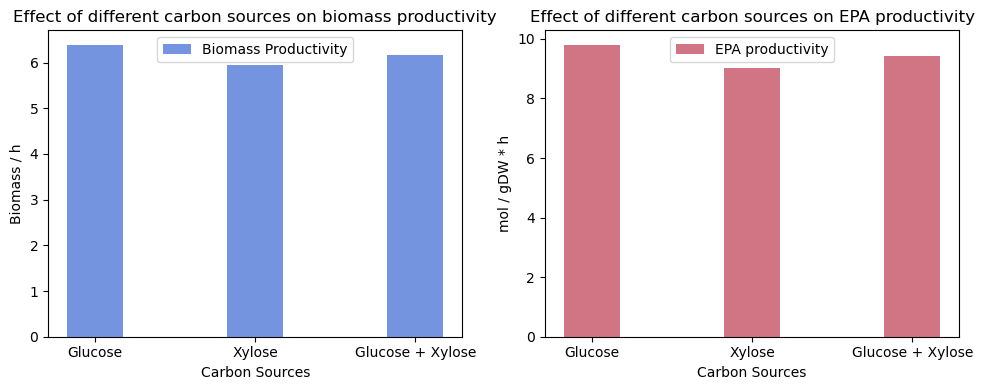

In [18]:
import matplotlib.pyplot as plt
import numpy as np

color1 = (0.1, # redness
         0.3, # greenness
         0.8, # blueness
         0.6 # transparency 
        ) 

color2 = (0.7, # redness
         0.1, # greenness
         0.2, # blueness
         0.6 # transparency 
        ) 

# Sample data
carbon_sources = ['Glucose', 'Xylose', 'Glucose + Xylose']
Biomass = [solution.fluxes['BIOMASS_SC4_bal'], solution4.fluxes['BIOMASS_SC4_bal'], solution5.fluxes['BIOMASS_SC4_bal']]
EPA = [EPA_production, EPA_production4, EPA_production5]

# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Width of the bars
bar_width = 0.35

# Create bar plots on the first axis
bar1 = ax1.bar(np.arange(len(carbon_sources)), Biomass, bar_width, label='Biomass Productivity', color=color1)
ax1.set_xlabel('Carbon Sources')
ax1.set_ylabel('Biomass / h')
ax1.set_title('Effect of different carbon sources on biomass productivity')
ax1.set_xticks(np.arange(len(carbon_sources)))
ax1.set_xticklabels(carbon_sources)
ax1.legend()

# Create bar plots on the second axis
bar2 = ax2.bar(np.arange(len(carbon_sources)), EPA, bar_width, label='EPA productivity', color=color2)
ax2.set_xlabel('Carbon Sources')
ax2.set_ylabel('mol / gDW * h')
ax2.set_title('Effect of different carbon sources on EPA productivity')
ax2.set_xticks(np.arange(len(carbon_sources)))
ax2.set_xticklabels(carbon_sources)
ax2.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

#### Finding out how much sugar is the limit for biomass production and EPA production

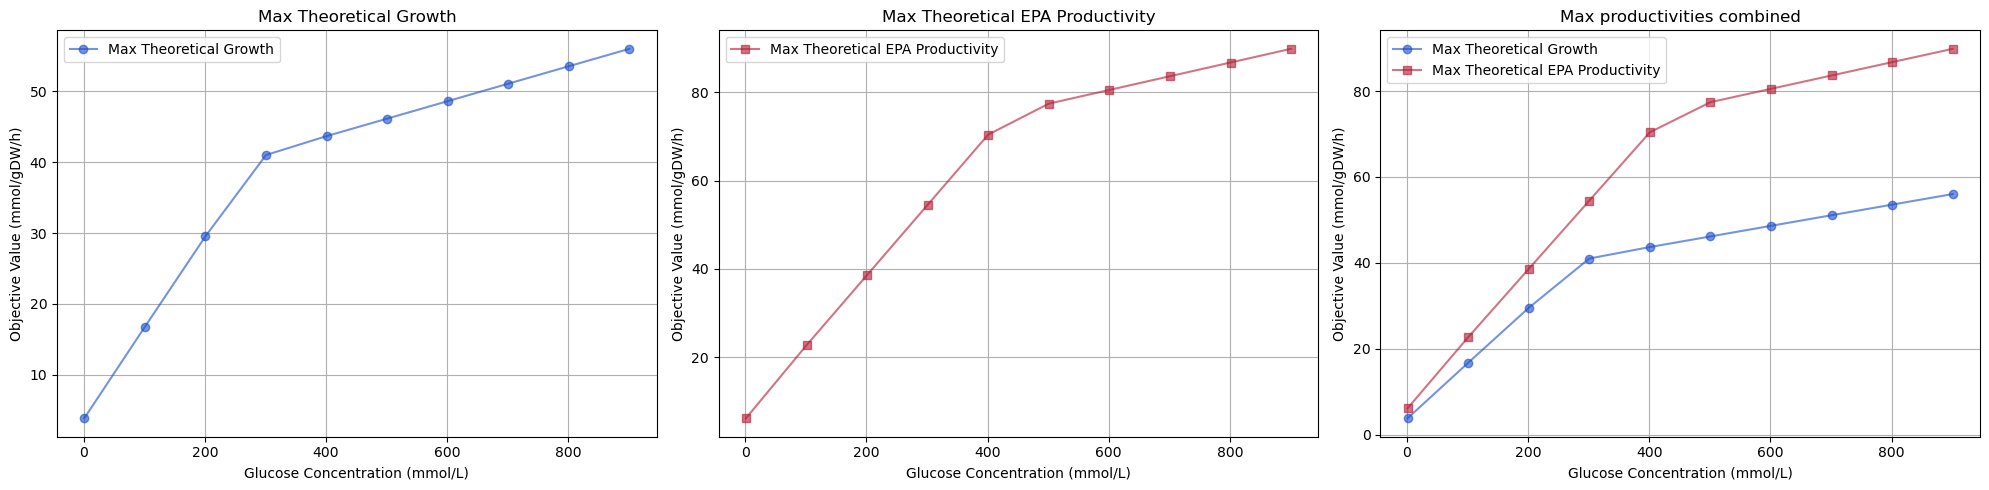

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the start[1], end point[2], and increases[3] in glucose concentration - ([1], [2], [3])
glucose_concentrations = list(range(1, 1000, 100))

# Make list for the results
results_list = []

EPA = solution.fluxes['DM_Eicosapentaenoic_Acid']

# Loop through glucose concentrations
for glucose in glucose_concentrations:
    with model:
        # Adjust medium to glucose concentrations
        medium = model.medium
        medium['EX_glc__D_e'] = glucose  
        model.medium = medium

        # Run the optimization for growth
        growth = model.optimize().objective_value

        # Run the optimization for EPA productivity
        model.objective = model.reactions.DM_Eicosapentaenoic_Acid
        EPA = model.optimize().objective_value

        # Append the results in list
        results_list.append({
            'Glucose_Concentration': glucose,
            'Growth': growth,
            'EPA_Productivity': EPA
        })
        
# Convert list of results to a DataFrame
results_df = pd.DataFrame(results_list)

# Plotting the max growth, max EPA productivity, and combined graphs
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns

# Growth only graph
axes[0].plot(results_df['Glucose_Concentration'], results_df['Growth'], color=color1, label='Max Theoretical Growth', marker='o')
axes[0].set_xlabel('Glucose Concentration (mmol/L)')
axes[0].set_ylabel('Objective Value (mmol/gDW/h)')
axes[0].set_title('Max Theoretical Growth')
axes[0].legend()
axes[0].grid(True)

# Isoamyl acetate productivity only graph
axes[1].plot(results_df['Glucose_Concentration'], results_df['EPA_Productivity'], color=color2, label='Max Theoretical EPA Productivity', marker='s')
axes[1].set_xlabel('Glucose Concentration (mmol/L)')
axes[1].set_ylabel('Objective Value (mmol/gDW/h)')
axes[1].set_title('Max Theoretical EPA Productivity')
axes[1].legend()
axes[1].grid(True)

# Combined graph
axes[2].plot(results_df['Glucose_Concentration'], results_df['Growth'], color=color1, label='Max Theoretical Growth', marker='o')
axes[2].plot(results_df['Glucose_Concentration'], results_df['EPA_Productivity'], color=color2, label='Max Theoretical EPA Productivity', marker='s')
axes[2].set_xlabel('Glucose Concentration (mmol/L)')
axes[2].set_ylabel('Objective Value (mmol/gDW/h)')
axes[2].set_title('Max productivities combined')
axes[2].legend()
axes[2].grid(True)

# Display the plots
plt.tight_layout()
plt.show()